In [2]:
from __future__ import print_function, division

# Images in Astronomy

In this lesson we are going to look at aspects of processing and viewing images specific to Astronomy and Solar Astronomy. By the end of this lesson you should understand:

* Projected Coordinate Systems in Images
* World Coordinate Systems
* Using WCS to calculate coordinates in images
* Plotting images with WCS in images
* Using SunPy Map

## Projected Coordinate Systems

When observing the sky using the stars appear to be 'projected' onto the celsital sphere. In that there is no distance coordinate and the physical location of any feature in the image can be described in a two dimensional coordinate system.

There are multiple coordinate systems used to describe the locations in 2D and 3D space for both Astronomy and Solar Physics. We shall use a couple of these systems here as examples but if you want to know more about them there are many of resources avalible.

### World Coordinate System

The FITS files have a standard for describing the physical coordinate system associated with imaging data, this is called the world coordinate system or WCS, sometimes the specific FITS version of this is referred to as FITS-WCS.

There are multiple papers describing the FITS-WCS standard for various types of data, there is a list here: http://fits.gsfc.nasa.gov/fits_wcs.html

As you learned in the previous lesson we can load FITS files with Astropy. To demonstrate a simple example of a FITS file with FITS-WCS information in the header we shall use an image from SunPy:

In [3]:
from sunpy.data.sample import AIA_171_IMAGE
from astropy.io import fits

hdulist = fits.open(AIA_171_IMAGE)
hdulist.verify('silentfix')
for k, v in hdulist[0].header.items():
    print(k, v)

SIMPLE True
BITPIX 32
NAXIS 2
NAXIS1 1024
NAXIS2 1024
EXTEND True
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
ORIGIN SDO/JSOC-SDP
DATE 2011-03-19T11:08:25
TELESCOP SDO/AIA
INSTRUME AIA_3
DATE-OBS 2011-03-19T10:54:00.34
T_OBS 2011-03-19T10:54:01.34Z
TOBSSTEP 90.0
TOBSEPOC 1977.01.01_00:00:00_TAI
CAMERA 3
IMG_TYPE LIGHT
EXPTIME 1.999601
EXPSDEV 0.00016
INT_TIME 2.273438
WAVELNTH 171
WAVEUNIT angstrom
WAVE_STR 171_THIN
FSN 22642033
FID 0
LVL_NUM 1.5
QUALLEV0 0
QUALITY 1073741824
TOTVALS 16777216
DATAVALS 16777216
MISSVALS 0
PERCENTD 100.0
DATAMIN -7
DATAMAX 16228
DATAMEDN 192
DATAMEAN 236.57
DATARMS 294.02
DATASKEW 4.63
DATAKURT 49.56
OSCNMEAN nan
OSCNRMS nan
FLAT_REC aia.flatfield[:#7]
CTYPE1 HPLN-TAN
CUNIT1 arcsec
CRVAL1 0.0
CDELT1 2.4
CRPIX1 512.5
CTYPE2 HPLT-TAN
CUNIT2 arcsec
CRVAL2 0.0
CDELT2 2.4
CRPIX2 512.5
CROTA2 0.0
R_SUN 1608.94397
MPO_REC sdo.master_pointing[:#11

As you can see there are lots of keys in this and most other real world FITS headers. The ones we need to understand for FITS-WCS are:

Reference Pixel and Coordinate:

In [4]:
header = hdulist[0].header

print(header['CRVAL1'], header['CRVAL2'])
print(header['CRPIX1'], header['CRPIX2'])

0.0 0.0
512.5 512.5


Grid Size:

In [5]:
print(header['CDELT1'], header['CDELT2'])

2.4 2.4


Rotation Information:

In [6]:
print(header['CROTA2'])

0.0


Coordinate System and Projection:

In [19]:
print(header['CTYPE1'], header['CTYPE2'])

HPLN-TAN HPLT-TAN


We could now sit down and work out how to convert from a pixel coordinate to a physical coordinate described by this header (Helioprojective).

However, we can cheat and just use Astropy.

In [7]:
from astropy.wcs import WCS

wcs = WCS(header)
print(wcs.wcs)

       flag: 137
      naxis: 2
      crpix: 0x2f5f060
               512.5        512.5     
         pc: 0x2a00900
    pc[0][]:   1           -0         
    pc[1][]:   0            1         
      cdelt: 0x47d3800
               0.00066667   0.00066667
      crval: 0x2e34990
               0            0         
      cunit: 0x2fbfc70
             "deg"
             "deg"
      ctype: 0x2d89e10
             "HPLN-TAN"
             "HPLT-TAN"
    lonpole: 180.000000
    latpole:  0.000000
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x2e48b40
    cd[0][]:   0            0         
    cd[1][]:   0            0         
      crota: 0x2f48930
               0            0         
     altlin: 4
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x2e34db0
                 0      0
    wcsname: UNDEFINED
      cname: 0x2d844a0
             UNDEFINED
             UNDEFINE

We can convert from pixel to world coordinate:

In [8]:
wcs.wcs_pix2world(((100, 100),), 1)

array([[  3.59725002e+02,  -2.74994721e-01]])

Or back again:

In [9]:
wcs.wcs_world2pix([[3.59725002e+02,  -2.74994721e-01]], 1)

array([[ 99.99983249,  99.99999987]])

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> How large is the image? </h2>
</div>
<br/>
To get a little practise using Astropy's WCS calculate the world coordinates of the following pixels:
<code>
[-500, 0]
[500, 500]
[0, 0]
</code>
<br/>
</section>

In [10]:
print(wcs.wcs_pix2world(((-500, 0),), 1))
print(wcs.wcs_pix2world(((500, 500),), 1))
print(wcs.wcs_pix2world(((0, 0),), 1))

[[  3.59325031e+02  -3.41638910e-01]]
[[  3.59991667e+02  -8.33333319e-03]]
[[  3.59658337e+02  -3.41656542e-01]]


## Plotting with wcsaxes

In this section we are going to use the wcsaxes package to make WCS aware image plots.

In [11]:
import wcsaxes

For this example we are going to use a Hubble image.

In [14]:
from astropy.io import fits

hdulist = fits.open('./h_n4571_f555_mosaic.fits.gz')
hdulist

In [15]:
wcs = WCS(hdulist[0].header)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

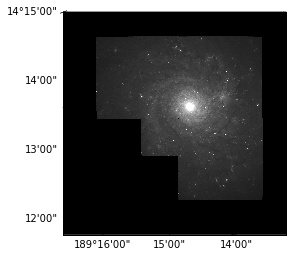

In [17]:
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')

This image now has physcial labels in the native coordinate system of the image. We can see what the coordinate system and projection of this image is using the 'CTYPE' header entries we saw earlier.

In [18]:
print(hdulist[0].header['CTYPE1'], hdulist[0].header['CTYPE2'])

RA---TAN DEC--TAN


We can tell that this is in the FK5 coordinate system by the presence of a 'equinox' entry in the header:

In [23]:
hdulist[0].header['equinox']

2000.0

There is also a quick way to generate an Astropy coordinate frame from a WCS object, which confirms this diagnosis.

In [24]:
from astropy.wcs.utils import wcs_to_celestial_frame
wcs_to_celestial_frame(wcs)

<FK5 Frame (equinox=2000.0)>

for more information on the very useful `astropy.coordinates` module see http://docs.astropy.org/en/stable/coordinates/

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Add some labels </h2>
</div>
<br/>
Now we have a nice plot with physically meaningful ticks, we should label our axes.

Add labels to the axes saying "Right Ascension [degrees]" and "Declination [degrees]"

Also overlay a coordinate grid using:
<code>ax.coords.grid(color='white', alpha=0.5, linestyle='solid') </code>
<br/>
</section>

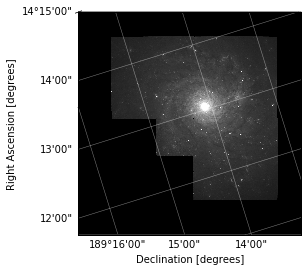

In [26]:
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')
ax.set_ylabel("Right Ascension [degrees]")
ax.set_xlabel("Declination [degrees]")
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')